In [64]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.applications import MobileNetV2

In [65]:
dataloc = '/kaggle/input/legomin/'

In [66]:
index_data = pd.read_csv('/kaggle/input/legomin/index.csv')
meta_data = pd.read_csv('/kaggle/input/legomin/metadata.csv')
dataset=pd.merge(index_df, meta_df[['class_id', 'minifigure_name']], on='class_id')

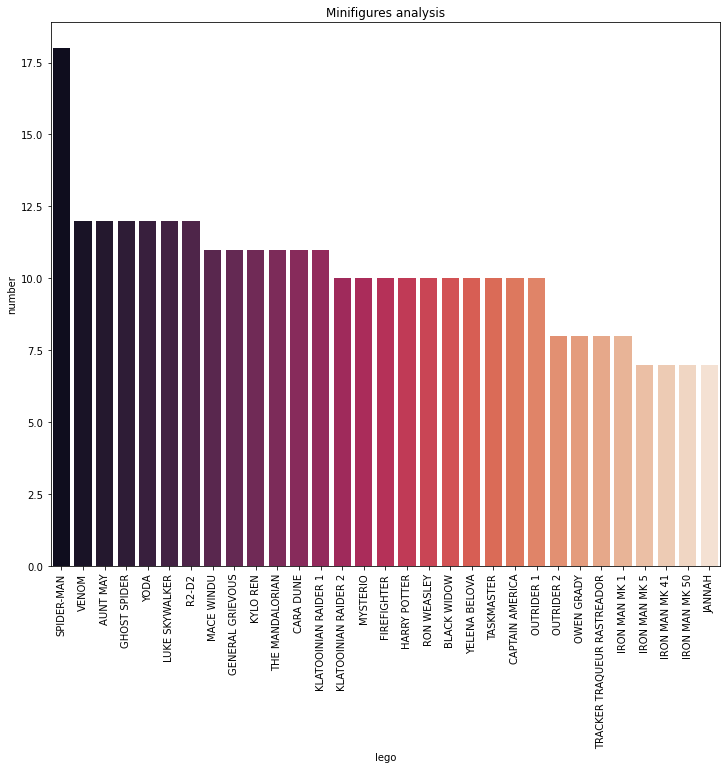

In [68]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.barplot(x=labels, y=count,palette="rocket")

plt.xticks(rotation= 90)
plt.xlabel('lego')
plt.ylabel('number')
plt.title('Minifigures analysis')
plt.show()

In [ ]:
x_train = dataset[dataset["train-valid"] == 'train']
y_valid = dataset[dataset["train-valid"] == 'valid']

In [ ]:
tot_classes = len(data_df['class_id'].unique())

In [ ]:
data_train = np.zeros((x_train.shape[0], 512, 512, 3))

for i in range(x_train.shape[0]):   
    image = cv2.imread('kaggle/input/legomin/' + x_train["path"].values[i])  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (512,512))]
    data_train[i] = image / 255.0
label_train = np.array(x_train["class_id"])-1

In [ ]:
data_valid = np.zeros(y_valid.shape[0], 512, 512, 3))

for i in range(y_valid.shape[0]):  
    image = cv2.imread('kaggle/input/legomin/' + y_valid["path"].values[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (512,512))
    data_valid[i] = image / 255.0
label_valid = np.array(y_valid["class_id"])-1

In [ ]:
data_train, label_train

In [ ]:
base = MobileNetV2()
x = Dropout(0.5)(base.layers[-2].output)
outputs = Dense(tot_classes, activation='softmax')(x)
model = Model(base.inputs, outputs)

In [ ]:
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
    data_train, label_train,
    epochs=40,
    validation_data=(data_valid, label_valid),
    shuffle=True,
    batch_size=4
)

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='valid loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend()

In [ ]:
testimg = cv2.imread('kaggle/input/legomin/star-wars/0001/001.jpg')
testimg = cv2.resize(testimg, (512,512))
testimg = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB) / 255.0

plt.imshow(testimg)

In [ ]:
testimg = np.reshape(testimg, (1, 512, 512, 3))

prediction = model.predict(testImage).argmax()
prediction = prediction + 1

name_fig = meta_df['minifigure_name'][meta_df['class_id'] == prediction].iloc[0]

print(name_fig)